# Prediction of plant species

#### We develop a model that predicts the specie of iris plant according to its attributes.

We load the dataset and explore some of its statistics.

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_table('iris.csv', sep=',')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data = data.drop('Id', axis=1)
data = shuffle(data)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
61,5.9,3.0,4.2,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
34,4.9,3.1,1.5,0.1,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
125,7.2,3.2,6.0,1.8,Iris-virginica
...,...,...,...,...,...
127,6.1,3.0,4.9,1.8,Iris-virginica
69,5.6,2.5,3.9,1.1,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 61 to 7
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [7]:
data.loc[:,'Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
unique_species = data.loc[:, 'Species'].unique()
unique_species

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'SepalWidthCm')

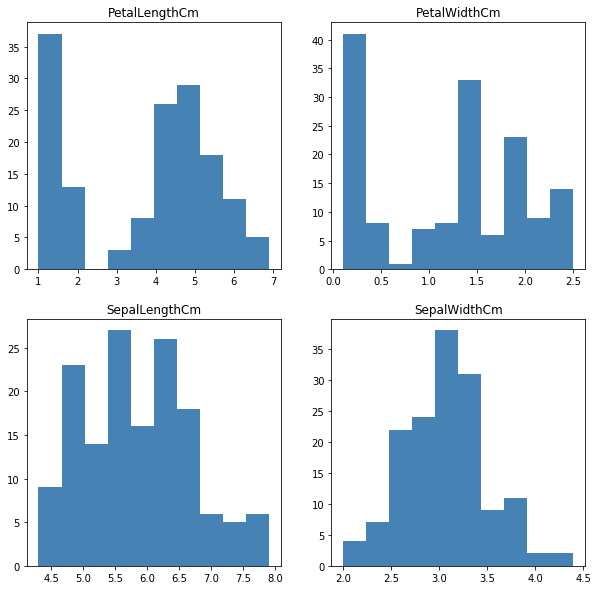

In [9]:
fig = plt.figure(figsize=(10, 10))
ax11 = fig.add_subplot(2, 2, 1)
ax11.hist(data.loc[:, 'PetalLengthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax11.set_title('PetalLengthCm')
ax12 = fig.add_subplot(2, 2, 2)
ax12.hist(data.loc[:, 'PetalWidthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax12.set_title('PetalWidthCm')
ax21 = fig.add_subplot(2, 2, 3)
ax21.hist(data.loc[:, 'SepalLengthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax21.set_title('SepalLengthCm')
ax22 = fig.add_subplot(2, 2, 4)
ax22.hist(data.loc[:, 'SepalWidthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax22.set_title('SepalWidthCm')

The dataset is quite clean and well balanced in each class so we procede to the other steps in preparation for training a model.

-----

We perfom a data preprocessing step and enlarge the original dataset to include a numerical label for 'Species' and the corresponding one-hot encoding. This is done in preparation for the later training step.

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(unique_species)

LabelEncoder()

In [11]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
species_label = le.transform(data.loc[:,'Species'])
species_label

array([1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0,
       1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0])

In [13]:
data.loc[:,'Species_label'] = species_label
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_label
61,5.9,3.0,4.2,1.5,Iris-versicolor,1
82,5.8,2.7,3.9,1.2,Iris-versicolor,1
34,4.9,3.1,1.5,0.1,Iris-setosa,0
53,5.5,2.3,4.0,1.3,Iris-versicolor,1
125,7.2,3.2,6.0,1.8,Iris-virginica,2
...,...,...,...,...,...,...
127,6.1,3.0,4.9,1.8,Iris-virginica,2
69,5.6,2.5,3.9,1.1,Iris-versicolor,1
85,6.0,3.4,4.5,1.6,Iris-versicolor,1
70,5.9,3.2,4.8,1.8,Iris-versicolor,1


In [14]:
data = pd.get_dummies(data)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_label,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
61,5.9,3.0,4.2,1.5,1,0,1,0
82,5.8,2.7,3.9,1.2,1,0,1,0
34,4.9,3.1,1.5,0.1,0,1,0,0
53,5.5,2.3,4.0,1.3,1,0,1,0
125,7.2,3.2,6.0,1.8,2,0,0,1
...,...,...,...,...,...,...,...,...
127,6.1,3.0,4.9,1.8,2,0,0,1
69,5.6,2.5,3.9,1.1,1,0,1,0
85,6.0,3.4,4.5,1.6,1,0,1,0
70,5.9,3.2,4.8,1.8,1,0,1,0


-----

Because the dataset is multivariate, we use PCA as a way to lower the dimension of the data points and be able to plot them.

In [15]:
X = data.iloc[:,:4].values
Y = data.iloc[:,-3:].values
Y_labels = data.iloc[:,[4]].values

In [16]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
X_red = pca.transform(X)
X_pred = pca.inverse_transform(X_red)

In [19]:
np.mean(np.sum(np.square(X-X_pred), axis=1), axis=0)

0.10152555565202218

-----

Here we define and use a function to plot the transformed data points obtained by performing PCA in the last step.

In [20]:
def plot_pca():
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.axis([np.min(X_red[:,0])-0.1, np.max(X_red[:,0])+0.1, np.min(X_red[:,1])-0.1, np.max(X_red[:,1])+0.1])
    iris_setosa = np.where(Y_labels == np.where(le.classes_ == 'Iris-setosa')[0][0])[0]
    iris_versicolor = np.where(Y_labels == np.where(le.classes_ == 'Iris-versicolor')[0][0])[0]
    iris_virginica = np.where(Y_labels == np.where(le.classes_ == 'Iris-virginica')[0][0])[0]
    ax.plot(X_red[iris_setosa,0], X_red[iris_setosa,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='iris_setosa') 
    ax.plot(X_red[iris_versicolor,0], X_red[iris_versicolor,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='iris_versicolor') 
    ax.plot(X_red[iris_virginica,0], X_red[iris_virginica,1], marker='.', color='#00BA7F', markersize=10, linestyle='', label='iris_virginica') 
    ax.legend()

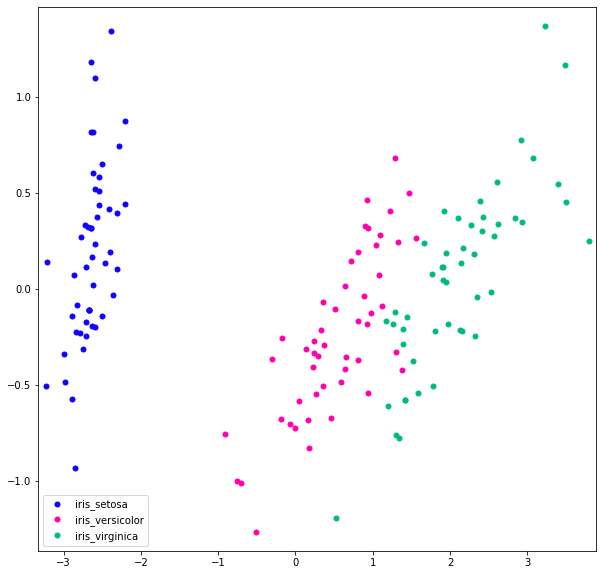

In [21]:
plot_pca()

-----

Here we define the function that trains the model.

In [22]:
def Model(dims):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-mu)/sigma,
                                     input_shape=[dims[0]]))
    
    for dim in dims[1:-1]:
        model.add(tf.keras.layers.Dense(units=dim, 
                                        activation='relu', 
                                        kernel_initializer='he_uniform', 
                                        bias_initializer='zeros'))
    model.add(tf.keras.layers.Dense(dims[-1], 
                                    activation='softmax', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
  
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(X, Y, epochs=10000, batch_size=32, callbacks=[callback1, callback2])
    return model

This function shows the training history of the model to see how is performing in every step 

In [23]:
def plot_model_training(model):
    loss = model.history.history['loss']
    accuracy = model.history.history['categorical_accuracy']

    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('Loss')
    ax1.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='-')

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('Accuracy')
    ax2.plot(accuracy, marker='.', color='#0F00FF', markersize=1, linestyle='-')

This function plots the results of the model obtained after training. The plotting is done at the level of the transformed data points by PCA. This gives us a way to visualize how well the model is performing, but also a feeling if there is some kind of overfitting because the display of complex and sinuose regions would be an indication of that. 

In [24]:
def plot_model(model):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.axis([np.min(X_red[:,0])-0.1, np.max(X_red[:,0])+0.1, np.min(X_red[:,1])-0.1, np.max(X_red[:,1])+0.1])
    u = np.linspace(np.min(X_red[:,0])-0.1, np.max(X_red[:,0])+0.1, 100)
    v = np.linspace(np.min(X_red[:,1])-0.1, np.max(X_red[:,1])+0.1, 100)
    z = []
    for i in range(100):
        for j in range(100):
            z.append([u[i], v[j]])
    z = np.array(z)
    z_ = pca.inverse_transform(z)
    w = np.argmax(model.predict(z_), axis=1)
    iris_setosa = np.where(w == np.where(le.classes_ == 'Iris-setosa')[0][0])[0]
    iris_versicolor = np.where(w == np.where(le.classes_ == 'Iris-versicolor')[0][0])[0]
    iris_virginica = np.where(w == np.where(le.classes_ == 'Iris-virginica')[0][0])[0]
    ax.plot(z[iris_setosa,0], z[iris_setosa,1], marker='+', color='#C7C3FF', markersize=10, linestyle='') 
    ax.plot(z[iris_versicolor,0], z[iris_versicolor,1], marker='+', color='#FFECFB', markersize=10, linestyle='') 
    ax.plot(z[iris_virginica,0], z[iris_virginica,1], marker='+', color='#C8FFB0', markersize=10, linestyle='') 
    iris_setosa = np.where(Y_labels == np.where(le.classes_ == 'Iris-setosa')[0][0])[0]
    iris_versicolor = np.where(Y_labels == np.where(le.classes_ == 'Iris-versicolor')[0][0])[0]
    iris_virginica = np.where(Y_labels == np.where(le.classes_ == 'Iris-virginica')[0][0])[0]
    ax.plot(X_red[iris_setosa,0], X_red[iris_setosa,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='iris_setosa') 
    ax.plot(X_red[iris_versicolor,0], X_red[iris_versicolor,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='iris_versicolor') 
    ax.plot(X_red[iris_virginica,0], X_red[iris_virginica,1], marker='.', color='#00BA7F', markersize=10, linestyle='', label='iris_virginica') 
    ax.legend()

-----

Here we train a basic Softmax model, an equivalent version of Linear Discriminant Analysis.

In [25]:
model_1 = Model([X.shape[1],Y.shape[1]])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples
Epoch 1/10000
150/150 [==============================] - 0s 2ms/sample - loss: 1.1863 - categorical_accuracy: 0.3733
Epoch 2/10000
150/150 [==============================] - 0s 47us/sample - loss: 1.0386 - categorical_accuracy: 0.4867
Epoch 3/10000
150/150 [==============================] - 0s 72us/sample - loss: 0.9207 - categorical_accuracy: 0.6067
Epoch 4/10000
150/150 [==============================] - 0s 63us/sample - loss: 0.8264 - categorical_accuracy: 0.6600
Epoch 5/10000
150/150 [=======

150/150 [==============================] - 0s 61us/sample - loss: 0.1232 - categorical_accuracy: 0.9733
Epoch 133/10000
150/150 [==============================] - 0s 60us/sample - loss: 0.1225 - categorical_accuracy: 0.9733
Epoch 134/10000
150/150 [==============================] - 0s 66us/sample - loss: 0.1220 - categorical_accuracy: 0.9733
Epoch 135/10000
150/150 [==============================] - 0s 72us/sample - loss: 0.1213 - categorical_accuracy: 0.9733
Epoch 136/10000
150/150 [==============================] - 0s 72us/sample - loss: 0.1207 - categorical_accuracy: 0.9733
Epoch 137/10000
150/150 [==============================] - 0s 58us/sample - loss: 0.1201 - categorical_accuracy: 0.9733
Epoch 138/10000
150/150 [==============================] - 0s 62us/sample - loss: 0.1195 - categorical_accuracy: 0.9733
Epoch 139/10000
150/150 [==============================] - 0s 55us/sample - loss: 0.1189 - categorical_accuracy: 0.9733
Epoch 140/10000
150/150 [==============================]

150/150 [==============================] - 0s 46us/sample - loss: 0.0790 - categorical_accuracy: 0.9733
Epoch 269/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0788 - categorical_accuracy: 0.9733
Epoch 270/10000
150/150 [==============================] - 0s 51us/sample - loss: 0.0785 - categorical_accuracy: 0.9733
Epoch 271/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0783 - categorical_accuracy: 0.9733
Epoch 272/10000
150/150 [==============================] - 0s 49us/sample - loss: 0.0782 - categorical_accuracy: 0.9733
Epoch 273/10000
150/150 [==============================] - 0s 49us/sample - loss: 0.0780 - categorical_accuracy: 0.9733
Epoch 274/10000
150/150 [==============================] - 0s 56us/sample - loss: 0.0779 - categorical_accuracy: 0.9733
Epoch 275/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0777 - categorical_accuracy: 0.9733
Epoch 276/10000
150/150 [==============================]

150/150 [==============================] - 0s 59us/sample - loss: 0.0635 - categorical_accuracy: 0.9800
Epoch 405/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0634 - categorical_accuracy: 0.9800
Epoch 406/10000
150/150 [==============================] - 0s 69us/sample - loss: 0.0633 - categorical_accuracy: 0.9800
Epoch 407/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0633 - categorical_accuracy: 0.9800
Epoch 408/10000
150/150 [==============================] - 0s 63us/sample - loss: 0.0632 - categorical_accuracy: 0.9733
Epoch 409/10000
150/150 [==============================] - 0s 62us/sample - loss: 0.0631 - categorical_accuracy: 0.9733
Epoch 410/10000
150/150 [==============================] - 0s 51us/sample - loss: 0.0630 - categorical_accuracy: 0.9800
Epoch 411/10000
150/150 [==============================] - 0s 75us/sample - loss: 0.0630 - categorical_accuracy: 0.9800
Epoch 412/10000
150/150 [==============================]

Epoch 472/10000
150/150 [==============================] - 0s 43us/sample - loss: 0.0591 - categorical_accuracy: 0.9800
Epoch 473/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0591 - categorical_accuracy: 0.9800
Epoch 474/10000
150/150 [==============================] - 0s 48us/sample - loss: 0.0589 - categorical_accuracy: 0.9800
Epoch 475/10000
150/150 [==============================] - 0s 62us/sample - loss: 0.0589 - categorical_accuracy: 0.9800
Epoch 476/10000
150/150 [==============================] - 0s 47us/sample - loss: 0.0589 - categorical_accuracy: 0.9800
Epoch 477/10000
150/150 [==============================] - 0s 46us/sample - loss: 0.0588 - categorical_accuracy: 0.9800
Epoch 478/10000
150/150 [==============================] - 0s 48us/sample - loss: 0.0587 - categorical_accuracy: 0.9800
Epoch 479/10000
150/150 [==============================] - 0s 49us/sample - loss: 0.0587 - categorical_accuracy: 0.9800
Epoch 480/10000
150/150 [===============

150/150 [==============================] - 0s 52us/sample - loss: 0.0532 - categorical_accuracy: 0.9800
Epoch 609/10000
150/150 [==============================] - 0s 48us/sample - loss: 0.0532 - categorical_accuracy: 0.9800
Epoch 610/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0532 - categorical_accuracy: 0.9800
Epoch 611/10000
150/150 [==============================] - 0s 44us/sample - loss: 0.0531 - categorical_accuracy: 0.9800
Epoch 612/10000
150/150 [==============================] - 0s 52us/sample - loss: 0.0531 - categorical_accuracy: 0.9800
Epoch 613/10000
150/150 [==============================] - 0s 54us/sample - loss: 0.0530 - categorical_accuracy: 0.9800
Epoch 614/10000
150/150 [==============================] - 0s 44us/sample - loss: 0.0533 - categorical_accuracy: 0.9800
Epoch 615/10000
150/150 [==============================] - 0s 53us/sample - loss: 0.0530 - categorical_accuracy: 0.9800
Epoch 616/10000
150/150 [==============================]

150/150 [==============================] - 0s 69us/sample - loss: 0.0497 - categorical_accuracy: 0.9800
Epoch 745/10000
150/150 [==============================] - 0s 56us/sample - loss: 0.0497 - categorical_accuracy: 0.9800
Epoch 746/10000
150/150 [==============================] - 0s 61us/sample - loss: 0.0497 - categorical_accuracy: 0.9800
Epoch 747/10000
150/150 [==============================] - 0s 74us/sample - loss: 0.0496 - categorical_accuracy: 0.9800
Epoch 748/10000
150/150 [==============================] - 0s 53us/sample - loss: 0.0498 - categorical_accuracy: 0.9800
Epoch 749/10000
150/150 [==============================] - 0s 74us/sample - loss: 0.0496 - categorical_accuracy: 0.9800
Epoch 750/10000
150/150 [==============================] - 0s 87us/sample - loss: 0.0496 - categorical_accuracy: 0.9800
Epoch 751/10000
150/150 [==============================] - 0s 94us/sample - loss: 0.0495 - categorical_accuracy: 0.9800
Epoch 752/10000
150/150 [==============================]

150/150 [==============================] - 0s 62us/sample - loss: 0.0474 - categorical_accuracy: 0.9800
Epoch 881/10000
150/150 [==============================] - 0s 63us/sample - loss: 0.0474 - categorical_accuracy: 0.9800
Epoch 882/10000
150/150 [==============================] - 0s 53us/sample - loss: 0.0477 - categorical_accuracy: 0.9800
Epoch 883/10000
150/150 [==============================] - 0s 53us/sample - loss: 0.0475 - categorical_accuracy: 0.9800
Epoch 884/10000
150/150 [==============================] - 0s 68us/sample - loss: 0.0475 - categorical_accuracy: 0.9800
Epoch 885/10000
150/150 [==============================] - 0s 66us/sample - loss: 0.0473 - categorical_accuracy: 0.9800
Epoch 886/10000
150/150 [==============================] - 0s 48us/sample - loss: 0.0473 - categorical_accuracy: 0.9800
Epoch 887/10000
150/150 [==============================] - 0s 51us/sample - loss: 0.0474 - categorical_accuracy: 0.9800
Epoch 888/10000
150/150 [==============================]

150/150 [==============================] - 0s 59us/sample - loss: 0.0457 - categorical_accuracy: 0.9800
Epoch 1017/10000
150/150 [==============================] - 0s 48us/sample - loss: 0.0457 - categorical_accuracy: 0.9800
Epoch 1018/10000
150/150 [==============================] - 0s 52us/sample - loss: 0.0457 - categorical_accuracy: 0.9800
Epoch 1019/10000
150/150 [==============================] - 0s 60us/sample - loss: 0.0458 - categorical_accuracy: 0.9800
Epoch 1020/10000
150/150 [==============================] - 0s 50us/sample - loss: 0.0457 - categorical_accuracy: 0.9800
Epoch 1021/10000
150/150 [==============================] - 0s 53us/sample - loss: 0.0457 - categorical_accuracy: 0.9800
Epoch 1022/10000
150/150 [==============================] - 0s 52us/sample - loss: 0.0457 - categorical_accuracy: 0.9800
Epoch 1023/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0459 - categorical_accuracy: 0.9800
Epoch 1024/10000
150/150 [=======================

150/150 [==============================] - 0s 52us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1151/10000
150/150 [==============================] - 0s 49us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1152/10000
150/150 [==============================] - 0s 54us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1153/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1154/10000
150/150 [==============================] - 0s 56us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1155/10000
150/150 [==============================] - 0s 50us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1156/10000
150/150 [==============================] - 0s 65us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1157/10000
150/150 [==============================] - 0s 50us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 1158/10000
150/150 [=======================

150/150 [==============================] - 0s 56us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1285/10000
150/150 [==============================] - 0s 60us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1286/10000
150/150 [==============================] - 0s 61us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1287/10000
150/150 [==============================] - 0s 56us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1288/10000
150/150 [==============================] - 0s 60us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1289/10000
150/150 [==============================] - 0s 51us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1290/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1291/10000
150/150 [==============================] - 0s 66us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1292/10000
150/150 [=======================

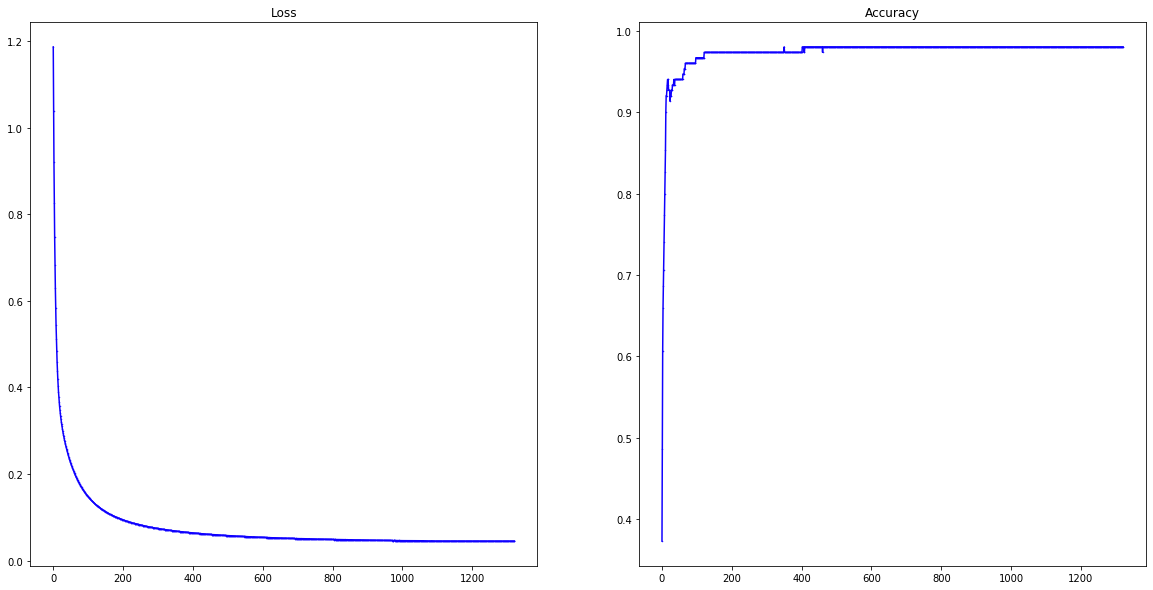

In [26]:
plot_model_training(model_1)

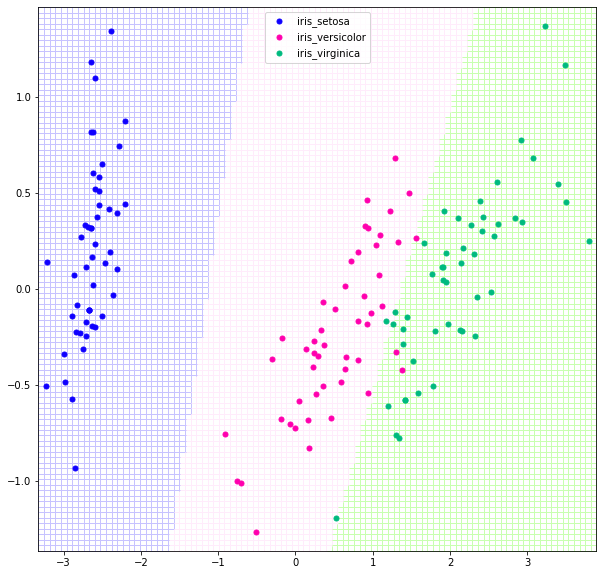

In [27]:
plot_model(model_1)

-----

Here we train a Shallow Neural Network to see how much we gain if we add some extra layers to the last model.

In [28]:
model_2 = Model([X.shape[1],64,Y.shape[1]])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples
Epoch 1/10000
150/150 [==============================] - 0s 1ms/sample - loss: 0.6443 - categorical_accuracy: 0.7467
Epoch 2/10000
150/150 [==============================] - 0s 50us/sample - loss: 0.3596 - categorical_accuracy: 0.8400
Epoch 3/10000
150/150 [==============================] - 0s 55us/sample - loss: 0.2605 - categorical_accuracy: 0.8800
Epoch 4/1000

150/150 [==============================] - 0s 64us/sample - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 132/10000
150/150 [==============================] - 0s 63us/sample - loss: 0.0086 - categorical_accuracy: 1.0000
Epoch 133/10000
150/150 [==============================] - 0s 67us/sample - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 134/10000
150/150 [==============================] - 0s 79us/sample - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 135/10000
150/150 [==============================] - 0s 77us/sample - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 136/10000
150/150 [==============================] - 0s 64us/sample - loss: 0.0095 - categorical_accuracy: 1.0000
Epoch 137/10000
150/150 [==============================] - 0s 67us/sample - loss: 0.0098 - categorical_accuracy: 1.0000
Epoch 138/10000
150/150 [==============================] - 0s 64us/sample - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 139/10000
150/150 [==============================]

150/150 [==============================] - 0s 63us/sample - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 268/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 269/10000
150/150 [==============================] - 0s 53us/sample - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 270/10000
150/150 [==============================] - 0s 59us/sample - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 271/10000
150/150 [==============================] - 0s 56us/sample - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 272/10000
150/150 [==============================] - 0s 52us/sample - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 273/10000
150/150 [==============================] - 0s 56us/sample - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 274/10000
150/150 [==============================] - 0s 58us/sample - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 275/10000
150/150 [==============================]

Epoch 335/10000
150/150 [==============================] - 0s 51us/sample - loss: 8.9399e-04 - categorical_accuracy: 1.0000
Epoch 336/10000
150/150 [==============================] - 0s 52us/sample - loss: 8.8649e-04 - categorical_accuracy: 1.0000
Epoch 337/10000
150/150 [==============================] - 0s 63us/sample - loss: 8.8281e-04 - categorical_accuracy: 1.0000
Epoch 338/10000
150/150 [==============================] - 0s 53us/sample - loss: 8.6716e-04 - categorical_accuracy: 1.0000
Epoch 339/10000
150/150 [==============================] - 0s 49us/sample - loss: 8.5502e-04 - categorical_accuracy: 1.0000
Epoch 340/10000
150/150 [==============================] - 0s 67us/sample - loss: 8.4641e-04 - categorical_accuracy: 1.0000
Epoch 341/10000
150/150 [==============================] - 0s 66us/sample - loss: 8.5240e-04 - categorical_accuracy: 1.0000
Epoch 342/10000
150/150 [==============================] - 0s 56us/sample - loss: 8.4439e-04 - categorical_accuracy: 1.0000
Epoch 34

150/150 [==============================] - 0s 64us/sample - loss: 6.9799e-04 - categorical_accuracy: 1.0000
Epoch 402/10000
150/150 [==============================] - 0s 50us/sample - loss: 6.9599e-04 - categorical_accuracy: 1.0000
Epoch 403/10000
150/150 [==============================] - 0s 51us/sample - loss: 6.9472e-04 - categorical_accuracy: 1.0000
Epoch 404/10000
150/150 [==============================] - 0s 65us/sample - loss: 6.9558e-04 - categorical_accuracy: 1.0000
Epoch 405/10000
150/150 [==============================] - 0s 50us/sample - loss: 6.9369e-04 - categorical_accuracy: 1.0000
Epoch 406/10000
150/150 [==============================] - 0s 62us/sample - loss: 6.9367e-04 - categorical_accuracy: 1.0000
Epoch 407/10000
150/150 [==============================] - 0s 57us/sample - loss: 6.9332e-04 - categorical_accuracy: 1.0000
Epoch 408/10000
150/150 [==============================] - 0s 55us/sample - loss: 6.9154e-04 - categorical_accuracy: 1.0000
Epoch 409/10000
150/150 

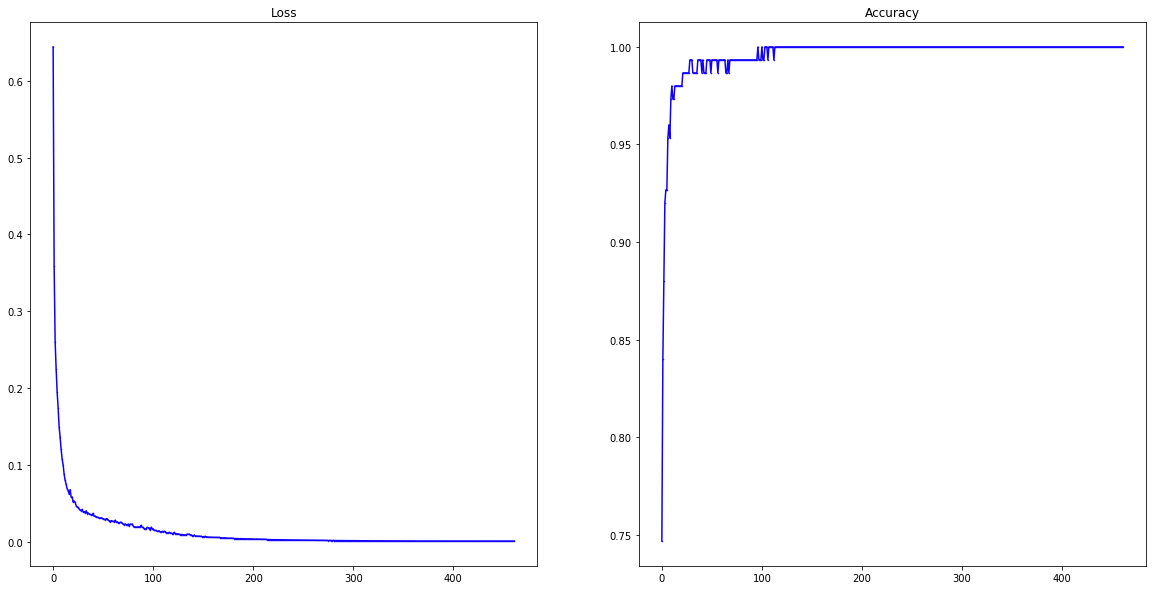

In [29]:
plot_model_training(model_2)

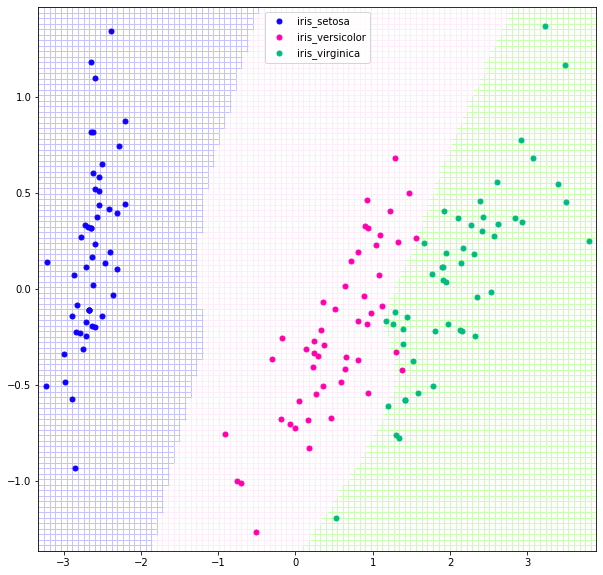

In [30]:
plot_model(model_2)

-----

Here we train a Deep Neural Network to see how much is gained from the last model.

In [31]:
model_3 = Model([X.shape[1],64,64,Y.shape[1]])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples
Epoch 1/10000
150/150 [==============================] - 0s 2ms/sample - loss: 1.3225 - categorical_accuracy: 0.5133
Epoch 2/10000
150/150 [==============================] - 0s 52us/sample - loss: 0.3861 - categorical_accuracy: 0

150/150 [==============================] - 0s 60us/sample - loss: 3.9592e-04 - categorical_accuracy: 1.0000
Epoch 130/10000
150/150 [==============================] - 0s 60us/sample - loss: 3.7395e-04 - categorical_accuracy: 1.0000
Epoch 131/10000
150/150 [==============================] - 0s 66us/sample - loss: 3.9991e-04 - categorical_accuracy: 1.0000
Epoch 132/10000
150/150 [==============================] - 0s 63us/sample - loss: 3.8010e-04 - categorical_accuracy: 1.0000
Epoch 133/10000
150/150 [==============================] - 0s 59us/sample - loss: 3.7677e-04 - categorical_accuracy: 1.0000
Epoch 134/10000
150/150 [==============================] - 0s 60us/sample - loss: 3.7004e-04 - categorical_accuracy: 1.0000
Epoch 135/10000
150/150 [==============================] - 0s 73us/sample - loss: 3.5591e-04 - categorical_accuracy: 1.0000
Epoch 136/10000
150/150 [==============================] - 0s 69us/sample - loss: 3.4598e-04 - categorical_accuracy: 1.0000
Epoch 137/10000
150/150 

150/150 [==============================] - 0s 57us/sample - loss: 1.5014e-04 - categorical_accuracy: 1.0000
Epoch 262/10000
150/150 [==============================] - 0s 69us/sample - loss: 1.4962e-04 - categorical_accuracy: 1.0000
Epoch 263/10000
150/150 [==============================] - 0s 66us/sample - loss: 1.4916e-04 - categorical_accuracy: 1.0000
Epoch 264/10000
150/150 [==============================] - 0s 66us/sample - loss: 1.4895e-04 - categorical_accuracy: 1.0000
Epoch 265/10000
150/150 [==============================] - 0s 58us/sample - loss: 1.4859e-04 - categorical_accuracy: 1.0000
Epoch 266/10000
150/150 [==============================] - 0s 56us/sample - loss: 1.4841e-04 - categorical_accuracy: 1.0000
Epoch 267/10000
150/150 [==============================] - 0s 75us/sample - loss: 1.4825e-04 - categorical_accuracy: 1.0000
Epoch 268/10000
150/150 [==============================] - 0s 62us/sample - loss: 1.4822e-04 - categorical_accuracy: 1.0000
Epoch 269/10000
150/150 

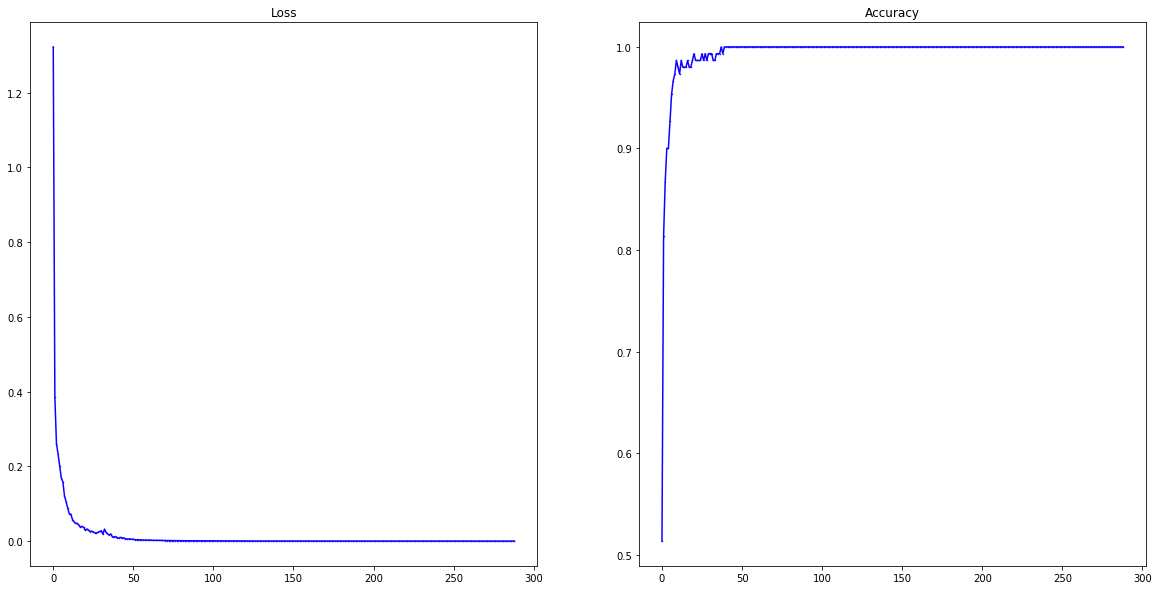

In [32]:
plot_model_training(model_3)

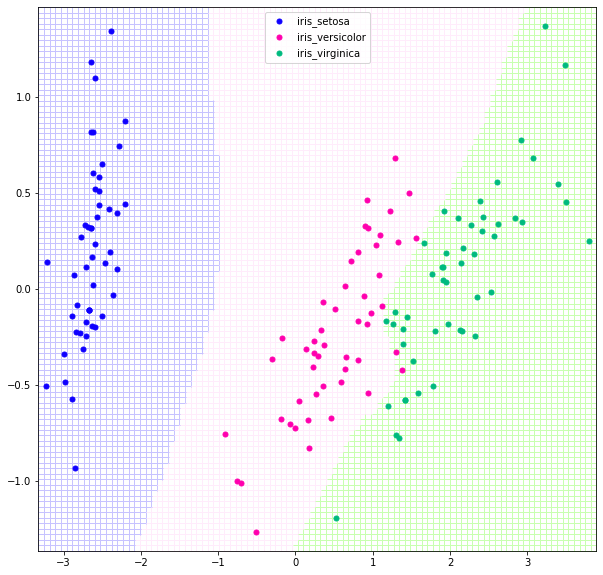

In [33]:
plot_model(model_3)

#### All models perform very well in the training dataset but as the graphics show, the last two of them adapt too much to the transformed data points which could be an indication of overfitting. The first model seems to be the most robust of all.